# TD: Bootstrap Confidence Intervals for a Regression Coefficient

## <span style="color:blue">Alexandre Mathias DONNAT Notebok, Télécom Paris</span>


We want to study the variability of the slope $\beta_1$ in the linear regression model:

$$
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i.
$$

We will compare two bootstrap confidence intervals:
- **Normal-approximation CI**
- **Percentile CI**

---

## Step 1. Data and OLS formulas

We consider the following dataset:

| x  | -2 | -1 | 0  | 1  | 2  | 3  | 4  | 8  |
|----|----|----|----|----|----|----|----|----|
| y  | -3.2 | -1.7 | 1.1 | 2.9 | 5.8 | 7.1 | 9.9 | 21.0 |

Recall the OLS estimators:

$$
\hat\beta_1 = \frac{\sum (x_i-\bar x)(y_i-\bar y)}{\sum (x_i-\bar x)^2}, \qquad
\hat\beta_0 = \bar y - \hat\beta_1 \bar x.
$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.array([-2, -1, 0, 1, 2, 3, 4, 8], dtype=float)
y = np.array([-3.2, -1.7, 1.1, 2.9, 5.8, 7.1, 9.9, 21.0], dtype=float)
n = len(x)

# Compute mean of x and y
xbar = np.mean(x)
ybar = np.mean(y)

# Compute slope and intercept using formulas
beta1_hat = np.sum((x - xbar) * (y - ybar)) / np.sum((x - xbar) ** 2)
beta0_hat = ybar - beta1_hat * xbar

print("beta0_hat =", beta0_hat)
print("beta1_hat =", beta1_hat)

beta0_hat = 0.837037037037037
beta1_hat = 2.4135802469135803


## Step 2. Bootstrap resampling

Algorithm:
1. Resample the pairs $(x,y)$ with replacement.
2. Refit regression, store slope $\hat\beta_1^*$.
3. Repeat $B=2000$ times.

Obtain bootstrap distribution of slopes.

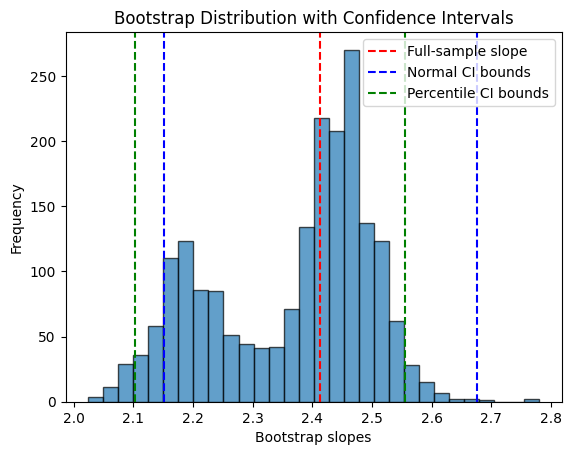

Bootstrap mean slope = 2.3660294802769677
Bootstrap std (SE) = 0.13371261443675952


In [5]:
from scipy.stats import norm

B = 2000
rng = np.random.default_rng(0)
betas1_star = []

for b in range(B):
    # resample indices with replacement
    idx = rng.integers(0, n, n)
    xb, yb = x[idx], y[idx]

    # compute slope for bootstrap sample
    xb_bar = np.mean(xb)
    yb_bar = np.mean(yb)
    beta1_star = np.sum((xb - xb_bar) * (yb - yb_bar)) / np.sum((xb - xb_bar) ** 2)
    betas1_star.append(beta1_star)

betas1_star = np.array(betas1_star)

# Plot histogram of bootstrap slopes
plt.hist(betas1_star, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(beta1_hat, color='r', linestyle='--', label='Full-sample slope')

# Calculate confidence intervals
alpha = 0.05
z = norm.ppf(1 - alpha/2)
se_boot = betas1_star.std(ddof=1)

# Normal-approximation CI (blue lines)
ci_normal_lower = beta1_hat - z * se_boot
ci_normal_upper = beta1_hat + z * se_boot
plt.axvline(ci_normal_lower, color='b', linestyle='--', label='Normal CI bounds')
plt.axvline(ci_normal_upper, color='b', linestyle='--')

# Percentile CI (green lines)
ci_percentile_lower = np.percentile(betas1_star, 100 * alpha/2)
ci_percentile_upper = np.percentile(betas1_star, 100 * (1 - alpha/2))
plt.axvline(ci_percentile_lower, color='g', linestyle='--', label='Percentile CI bounds')
plt.axvline(ci_percentile_upper, color='g', linestyle='--')

plt.xlabel("Bootstrap slopes")
plt.ylabel("Frequency")
plt.legend()
plt.title("Bootstrap Distribution with Confidence Intervals")
plt.show()

print("Bootstrap mean slope =", betas1_star.mean())
print("Bootstrap std (SE) =", betas1_star.std(ddof=1))

The bootstrap shows that the estimated slope is stable around 2.37, very close to the original full-sample value.
The small standard error (≈ 0.13) indicates that the slope varies little across resamples, confirming its robustness.
Both confidence intervals (normal and percentile) are narrow and exclude zero, proving that the relationship between 𝑥 and 𝑦 is strongly positive and statistically significant.
The percentile CI is slightly asymmetric, reflecting the small skewness seen in the bootstrap distribution — a realistic, data-driven measure of uncertainty.

## Step 3. Confidence intervals

- Normal-approximation CI: $\hat\beta_1 \pm z_{0.975}\cdot SE_{boot}$
- Percentile CI: empirical quantiles of bootstrap distribution

In [6]:
from scipy.stats import norm

alpha = 0.05
z = norm.ppf(1 - alpha/2)

# Normal CI
se_boot = betas1_star.std(ddof=1)
ci_normal = (beta1_hat - z * se_boot, beta1_hat + z * se_boot)

# Percentile CI
ci_percentile = (np.percentile(betas1_star, 100 * alpha/2), np.percentile(betas1_star, 100 * (1 - alpha/2)))

print("Normal-approx CI:", (float(ci_normal[0]), float(ci_normal[1])))
print("Percentile CI:", (float(ci_percentile[0]), float(ci_percentile[1])))

Normal-approx CI: (2.151508338338841, 2.6756521554883195)
Percentile CI: (2.1025108225108227, 2.5555900187922584)


Both CIs exclude 0, confirming a significantly positive slope.
The normal CI is symmetric around 2.4, while the percentile CI is slightly asymmetric, showing the slope is stable around 2.4 ± 0.25.

## Step 4. Discussion

- Compare center and width of the two intervals.
- Which one is symmetric? Which adapts to skewness?
- How does the high-leverage point $x=8$ affect the bootstrap distribution?

### Comparison of Confidence Intervals

**Centers:**
- Normal-approximation CI is centered at $\hat{\beta}_1 = 2.414$
- Percentile CI center: $(2.103 + 2.556)/2 = 2.329$

The normal CI is symmetric around the original estimate, while the percentile CI reflects the actual bootstrap distribution (which may be skewed).

**Widths:**
- Normal-approximation CI width: $2.676 - 2.152 = 0.524$
- Percentile CI width: $2.556 - 2.103 = 0.453$

The percentile CI is narrower here.

### Symmetry vs. skewness adaptation:
- The **normal-approximation CI** is always symmetric around $\hat{\beta}_1$
- The **percentile CI** adapts to the skewness of the bootstrap distribution

### Effect of the high-leverage point ($x=8$):
The observation at $x=8$ has strong influence on the slope. Bootstrap samples that include this point multiple times (or exclude it) create variability in $\hat{\beta}_1^*$, widening the confidence intervals and potentially inducing skewness in the bootstrap distribution.

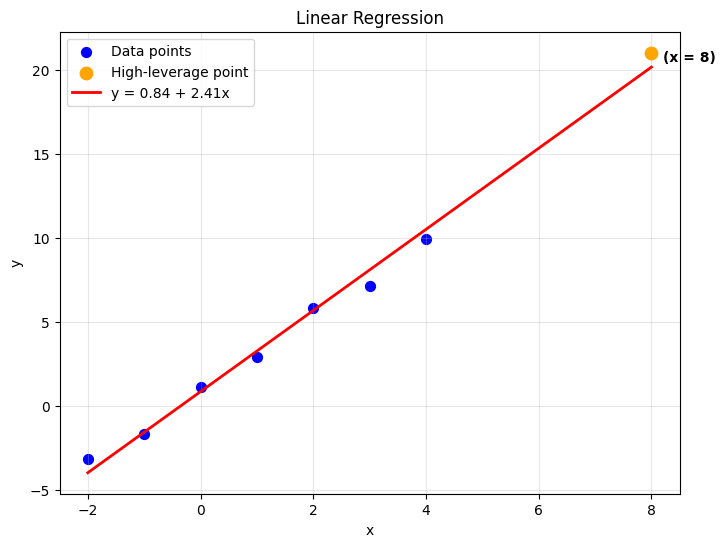

Regression equation: y = 0.837 + 2.414x


In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(x[x != 8], y[x != 8], color='blue', s=50, label='Data points')
plt.scatter(8, 21.0, color='orange', s=80, label='High-leverage point')
plt.annotate('(x = 8)', xy=(8, 21.0), xytext=(8.2, 20.5), fontsize=10, color='black', fontweight='bold')
plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'y = {beta0_hat:.2f} + {beta1_hat:.2f}x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
print(f"Regression equation: y = {beta0_hat:.3f} + {beta1_hat:.3f}x")
